In [4]:
# Regressão Logística 
# Previsão e Detecção de Risco de Crédito

# Obs: Caso tenha problemas com a acentuação, consulte este link:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

# Definindo o diretório de trabalho
#setwd("~/Dropbox/DSA/MachineLearning2.0/Cap05-R")
getwd()

[1] "C:/Users/cassi/OneDrive/Programação/DSA/MachineLearning2.0/Cap05-R"

In [5]:
# Instalando os pacotes
install.packages("caret")
install.packages("ROCR")
install.packages("e1071")

Warning message:
"package 'caret' is in use and will not be installed"Warning message:
"package 'ROCR' is in use and will not be installed"


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-3  1.7-4              TRUE

  Binaries will be installed


Warning message:
"package 'e1071' is in use and will not be installed"

In [6]:
# Carregando os pacotes
library(caret)
library(ROCR) 
library(e1071) 

In [7]:
# Carregando o dataset um um dataframe
credito_dataset <- read.csv("credit_dataset_final.csv", header = TRUE, sep = ",")
head(credito_dataset)

credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
1,1,10,3,4,2241,1,1,1,3,...,3,1,48,2,1,2,2,2,1,2


In [9]:
summary(credito_dataset)

 credit.rating account.balance credit.duration.months
 Min.   :0.0   Min.   :1.000   Min.   : 4.0          
 1st Qu.:0.0   1st Qu.:1.000   1st Qu.:12.0          
 Median :1.0   Median :2.000   Median :18.0          
 Mean   :0.7   Mean   :2.183   Mean   :20.9          
 3rd Qu.:1.0   3rd Qu.:3.000   3rd Qu.:24.0          
 Max.   :1.0   Max.   :3.000   Max.   :72.0          
 previous.credit.payment.status credit.purpose  credit.amount      savings     
 Min.   :1.000                  Min.   :1.000   Min.   :  250   Min.   :1.000  
 1st Qu.:2.000                  1st Qu.:2.000   1st Qu.: 1366   1st Qu.:1.000  
 Median :2.000                  Median :3.000   Median : 2320   Median :1.000  
 Mean   :2.292                  Mean   :2.965   Mean   : 3271   Mean   :1.874  
 3rd Qu.:3.000                  3rd Qu.:4.000   3rd Qu.: 3972   3rd Qu.:3.000  
 Max.   :3.000                  Max.   :4.000   Max.   :18424   Max.   :4.000  
 employment.duration installment.rate marital.status    guaran

In [11]:
str(credito_dataset)

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other.credits

In [12]:
View(credito_dataset)

ERROR: Error in View(credito_dataset): 'View()' not yet supported in the Jupyter R kernel


## Pré-processamento

In [13]:
# Transformando variáveis em fatores
to.factors <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}

In [14]:
# Normalização
scale.features <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- scale(df[[variable]], center = T, scale = T)
  }
  return(df)
}

In [15]:
# Normalizando as variáveis
numeric.vars <- c("credit.duration.months", "age", "credit.amount")
credito_dataset_scaled <- scale.features(credito_dataset, numeric.vars)

In [16]:
# Variáveis do tipo fator
categorical.vars <- c('credit.rating', 'account.balance', 'previous.credit.payment.status',
                      'credit.purpose', 'savings', 'employment.duration', 'installment.rate',
                      'marital.status', 'guarantor', 'residence.duration', 'current.assets',
                      'other.credits', 'apartment.type', 'bank.credits', 'occupation', 
                      'dependents', 'telephone', 'foreign.worker')

In [18]:
# Aplicando as conversões ao dataset
credito_dataset_final <- to.factors(df = credito_dataset_scaled, variables = categorical.vars)
head(credito_dataset_final)

credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
1,1,-0.2407368,3,2,-0.7872630,1,1,4,1,...,4,2,-1.28093214,2,1,1,3,1,1,1
1,1,-0.9870788,3,4,-0.1673006,1,2,2,3,...,2,1,0.04034293,2,1,2,3,2,1,1
1,2,-0.7382981,2,4,-0.8609500,2,3,2,1,...,4,1,-1.10476213,2,1,1,2,1,1,1
1,1,-0.7382981,3,4,-0.4071375,1,2,3,3,...,2,1,0.30459795,2,1,2,2,2,1,2
1,1,-0.7382981,3,4,-0.3897785,1,2,4,3,...,4,2,0.21651294,1,2,2,2,1,1,2
1,1,-0.9041519,3,4,-0.3649800,1,1,1,3,...,3,1,1.09736299,2,1,2,2,2,1,2


In [19]:
summary(credito_dataset_final)

 credit.rating account.balance credit.duration.months.V1
 0:300         1:274           Min.   :-1.401713        
 1:700         2:269           1st Qu.:-0.738298        
               3:457           Median :-0.240737        
                               Mean   : 0.000000        
                               3rd Qu.: 0.256825        
                               Max.   : 4.237315        
 previous.credit.payment.status credit.purpose  credit.amount.V1   savings
 1: 89                          1:103          Min.   :-1.070320   1:603  
 2:530                          2:181          1st Qu.:-0.675138   2:103  
 3:381                          3:364          Median :-0.337170   3:111  
                                4:352          Mean   : 0.000000   4:183  
                                               3rd Qu.: 0.248340          
                                               Max.   : 5.368078          
 employment.duration installment.rate marital.status guarantor
 1:234       

In [30]:
#View(credito_dataset_final)
head(credito_dataset_final)

credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
1,1,-0.2407368,3,2,-0.7872630,1,1,4,1,...,4,2,-1.28093214,2,1,1,3,1,1,1
1,1,-0.9870788,3,4,-0.1673006,1,2,2,3,...,2,1,0.04034293,2,1,2,3,2,1,1
1,2,-0.7382981,2,4,-0.8609500,2,3,2,1,...,4,1,-1.10476213,2,1,1,2,1,1,1
1,1,-0.7382981,3,4,-0.4071375,1,2,3,3,...,2,1,0.30459795,2,1,2,2,2,1,2
1,1,-0.7382981,3,4,-0.3897785,1,2,4,3,...,4,2,0.21651294,1,2,2,2,1,1,2
1,1,-0.9041519,3,4,-0.3649800,1,1,1,3,...,3,1,1.09736299,2,1,2,2,2,1,2


In [21]:
# Preparando os dados de treino e de teste
indexes <- sample(1:nrow(credito_dataset_final), size = 0.6 * nrow(credito_dataset_final))
train.data <- credito_dataset_final[indexes,]
test.data <- credito_dataset_final[-indexes,]
class(train.data)
class(test.data)

[1] "data.frame"

[1] "data.frame"

In [22]:
# Separando os atributos e as classes
test.feature.vars <- test.data[,-1]
test.class.var <- test.data[,1]
class(test.feature.vars)

[1] "data.frame"

In [23]:
# Construindo o modelo de regressão logística
formula.init <- "credit.rating ~ ."
formula.init <- as.formula(formula.init)
help(glm)
modelo_v1 <- glm(formula = formula.init, data = train.data, family = "binomial")

In [24]:
# Visualizando os detalhes do modelo
summary(modelo_v1)


Call:
glm(formula = formula.init, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8702  -0.7207   0.4138   0.7285   1.7796  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      0.37484    0.99031   0.379 0.705051    
account.balance2                 0.70694    0.29238   2.418 0.015610 *  
account.balance3                 1.73962    0.27650   6.292 3.14e-10 ***
credit.duration.months          -0.33170    0.15036  -2.206 0.027379 *  
previous.credit.payment.status2  0.49037    0.38514   1.273 0.202936    
previous.credit.payment.status3  0.97107    0.38798   2.503 0.012318 *  
credit.purpose2                 -1.50555    0.52346  -2.876 0.004025 ** 
credit.purpose3                 -1.32057    0.49594  -2.663 0.007750 ** 
credit.purpose4                 -1.61259    0.48408  -3.331 0.000865 ***
credit.amount                   -0.37953    0.17332  -2.190 0.0285

In [26]:
# Fazendo previsões e analisando o resultado
previsoes <- predict(modelo_v1, test.data, type = "response")
previsoes <- round(previsoes)
#View(previsoes)
head(previsoes)

5 12 13 19 21 22 
 1  1  1  1  1  1

In [27]:
# Confusion Matrix
confusionMatrix(table(data = previsoes, reference = test.class.var), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0  61  34
   1  62 243
                                         
               Accuracy : 0.76           
                 95% CI : (0.7151, 0.801)
    No Information Rate : 0.6925         
    P-Value [Acc > NIR] : 0.001697       
                                         
                  Kappa : 0.3984         
                                         
 Mcnemar's Test P-Value : 0.005857       
                                         
            Sensitivity : 0.8773         
            Specificity : 0.4959         
         Pos Pred Value : 0.7967         
         Neg Pred Value : 0.6421         
             Prevalence : 0.6925         
         Detection Rate : 0.6075         
   Detection Prevalence : 0.7625         
      Balanced Accuracy : 0.6866         
                                         
       'Positive' Class : 1              
                                         

In [28]:
# Feature Selection
formula <- "credit.rating ~ ."
formula <- as.formula(formula)
control <- trainControl(method = "repeatedcv", number = 10, repeats = 2)
model <- train(formula, data = train.data, method = "glm", trControl = control)
importance <- varImp(model, scale = FALSE)

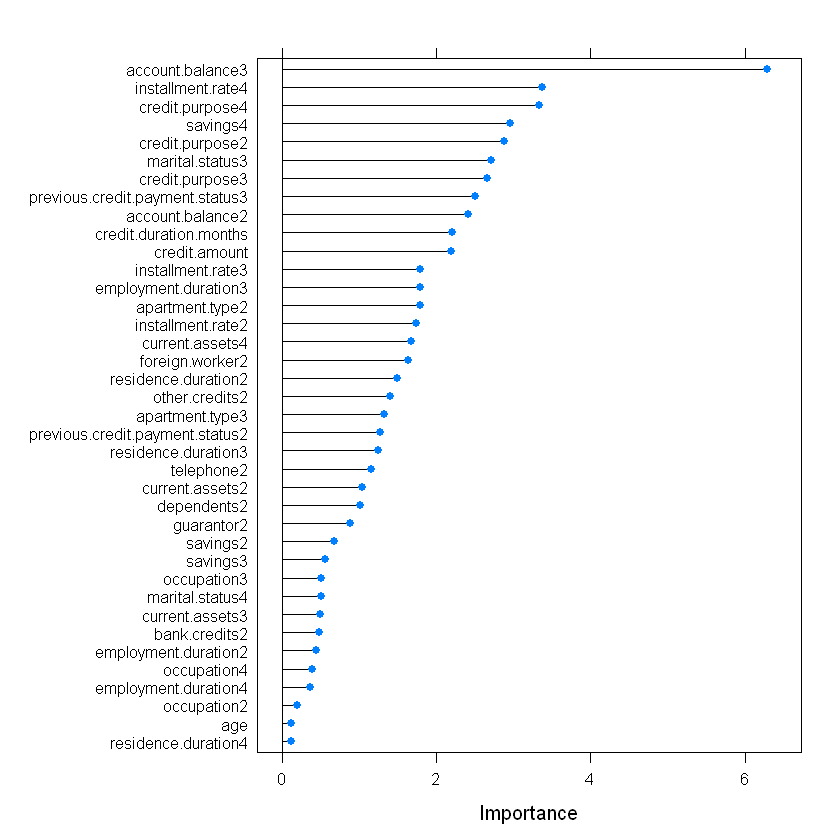

In [29]:
# Plot
plot(importance)

In [31]:
# Construindo um novo modelo com as variáveis selecionadas
formula.new <- "credit.rating ~ account.balance + credit.purpose + previous.credit.payment.status + savings + credit.duration.months"
formula.new <- as.formula(formula.new)
modelo_v2 <- glm(formula = formula.new, data = train.data, family = "binomial")

In [32]:
# Visualizando o novo modelo
summary(modelo_v2)


Call:
glm(formula = formula.new, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5527  -0.8730   0.4958   0.7915   1.8092  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       0.3505     0.5004   0.700  0.48371    
account.balance2                  0.5623     0.2566   2.191  0.02844 *  
account.balance3                  1.6307     0.2506   6.506 7.71e-11 ***
credit.purpose2                  -1.4432     0.4678  -3.085  0.00204 ** 
credit.purpose3                  -1.2265     0.4408  -2.783  0.00539 ** 
credit.purpose4                  -1.3860     0.4381  -3.163  0.00156 ** 
previous.credit.payment.status2   0.7242     0.3362   2.154  0.03123 *  
previous.credit.payment.status3   1.1225     0.3432   3.271  0.00107 ** 
savings2                          0.2517     0.3421   0.736  0.46181    
savings3                          0.1854     0.3351   0.553  0.5801

In [33]:
# Prevendo e Avaliando o modelo 
previsoes_new <- predict(modelo_v2, test.data, type = "response") 
previsoes_new <- round(previsoes_new)

In [34]:
# Confusion Matrix
confusionMatrix(table(data = previsoes_new, reference = test.class.var), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0  48  25
   1  75 252
                                          
               Accuracy : 0.75            
                 95% CI : (0.7046, 0.7917)
    No Information Rate : 0.6925          
    P-Value [Acc > NIR] : 0.006627        
                                          
                  Kappa : 0.3382          
                                          
 Mcnemar's Test P-Value : 9.584e-07       
                                          
            Sensitivity : 0.9097          
            Specificity : 0.3902          
         Pos Pred Value : 0.7706          
         Neg Pred Value : 0.6575          
             Prevalence : 0.6925          
         Detection Rate : 0.6300          
   Detection Prevalence : 0.8175          
      Balanced Accuracy : 0.6500          
                                          
       'Positive' Class : 1               
                                          

## Avaliando a performance do modelo

In [35]:
# Plot do modelo com melhor acurácia
modelo_final <- modelo_v2
previsoes <- predict(modelo_final, test.feature.vars, type = "response")
previsoes_finais <- prediction(previsoes, test.class.var)

In [36]:
# Função para Plot ROC 
plot.roc.curve <- function(predictions, title.text){
  perf <- performance(predictions, "tpr", "fpr")
  plot(perf,col = "black",lty = 1, lwd = 2,
       main = title.text, cex.main = 0.6, cex.lab = 0.8,xaxs = "i", yaxs = "i")
  abline(0,1, col = "red")
  auc <- performance(predictions,"auc")
  auc <- unlist(slot(auc, "y.values"))
  auc <- round(auc,2)
  legend(0.4,0.4,legend = c(paste0("AUC: ",auc)), cex = 0.6, bty = "n", box.col = "white")
  
}

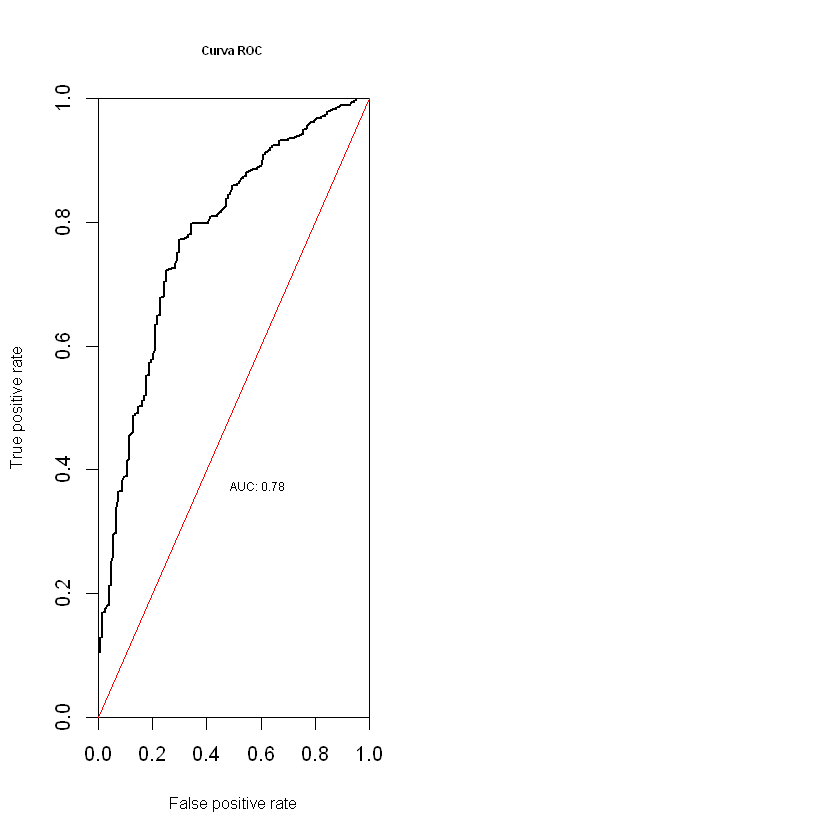

In [37]:
# Plot
par(mfrow = c(1, 2))
plot.roc.curve(previsoes_finais, title.text = "Curva ROC")

## Fazendo previsões em novos dados

In [38]:
# Novos dados
account.balance <- c(1, 4, 3)
credit.purpose <- c(4, 2, 3)
previous.credit.payment.status <- c(3, 3, 2)
savings <- c(2, 3, 2)
credit.duration.months <- c(15, 12, 8)

In [40]:
# Cria um dataframe
novo_dataset <- data.frame(account.balance, 
                           credit.purpose, 
                           previous.credit.payment.status, 
                           savings, 
                          credit.duration.months)

#View(novo_dataset)
head(novo_dataset)

account.balance,credit.purpose,previous.credit.payment.status,savings,credit.duration.months
1,4,3,2,15
4,2,3,3,12
3,3,2,2,8


In [41]:
# Separa variáveis explanatórias numéricas e categóricas
new.numeric.vars <- c("credit.duration.months")
new.categorical.vars <- c('account.balance', 'previous.credit.payment.status', 
                          'credit.purpose', 'savings')

In [43]:
# Aplica as transformações
novo_dataset_final <- to.factors(df = novo_dataset, variables = new.categorical.vars)
str(novo_dataset_final)

'data.frame':	3 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","3","4": 1 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1
 $ credit.duration.months        : num  15 12 8


In [44]:
novo_dataset_final <- scale.features(novo_dataset_final, new.numeric.vars)
str(novo_dataset_final)

'data.frame':	3 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","3","4": 1 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1
 $ credit.duration.months        : num [1:3, 1] 0.9492 0.0949 -1.0441
  ..- attr(*, "scaled:center")= num 11.7
  ..- attr(*, "scaled:scale")= num 3.51


In [46]:
head(novo_dataset_final)

account.balance,credit.purpose,previous.credit.payment.status,savings,credit.duration.months
1,4,3,2,0.9491580
4,2,3,3,0.0949158
3,3,2,2,-1.0440738


In [47]:
# Previsões
?predict
previsao_novo_cliente <- predict(modelo_final, newdata = novo_dataset_final, type = "response")

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor account.balance has new levels 4
